# Taller #5: Algoritmos Genéticos - Camuflaje y Maze Runner

## Integrantes:

- Elkin Cuello
- Jaime Torres


---

# Implementación de un Algoritmo Genético para Camuflaje de un Cubo

## 1. Definición del Problema

El objetivo es desarrollar un algoritmo genético que ajuste el color de un cubo para que se camufle con su entorno. En este caso, buscamos que el color del cubo en escala de grises se aproxime al del fondo.

- **Objetivo**: Ajustar el nivel de gris del cubo para que sea lo más similar posible al del fondo.
- **Justificación**: El uso de un algoritmo genético permite encontrar una solución óptima o cercana al óptimo en un espacio de búsqueda continuo y potencialmente complejo.

## 2. Diseño del Algoritmo Genético

### - Representación Genética

- **Genotipo**: Un valor numérico que representa el nivel de gris del cubo (0 a 255).
- **Fenotipo**: El color real del cubo en escala de grises.

### - Población Inicial

- **Tamaño**: 100 individuos.
- **Inicialización**: Valores de gris aleatorios entre 0 y 255.

### - Función de Aptitud

- **Definición**: 
$
\text{Aptitud}(i) = -|\text{Gris}_{\text{individuo}} - \text{Gris}_{\text{fondo}}|
$

- **Objetivo**: Minimizar la diferencia absoluta entre el gris del cubo y el del fondo.

### - Selección

- **Método**: Selección elitista, conservando el 20% de los individuos con mayor aptitud.

### - Operadores Genéticos

#### a. Cruce

- **Tipo**: Cruce de un punto.
- **Proceso**: Combinar partes de los padres para crear descendientes.

#### b. Mutación

- **Probabilidad**: 1% por individuo.
- **Proceso**: Ajustar el nivel de gris del individuo en un pequeño valor aleatorio.

### - Criterio de Parada

- **Condiciones**:
  - Alcanzar una diferencia mínima aceptable entre el gris del cubo y el del fondo.
  - Alcanzar un número máximo de generaciones.

### Algoritmo

```pseudo
BEGIN AlgoritmoGenéticoCamuflaje
    // Parámetros del algoritmo
    TamañoPoblación ← 100
    MáxGeneraciones ← 50
    TasaCruce ← 0.8
    TasaMutación ← 0.01
    PorcentajeElitismo ← 0.2
    UmbralAptitud ← -1 // Diferencia máxima aceptable
    
    // Inicializar población
    Población ← InicializarPoblación(TamañoPoblación)
    
    // Evaluar población inicial
    PARA cada individuo EN Población HACER
        individuo.Aptitud ← EvaluarAptitud(individuo)
    FIN PARA
    
    Generación ← 0
    
    MIENTRAS Generación < MáxGeneraciones Y NO CumpleCriterioParada(Población, UmbralAptitud) HACER
        // Selección
        MejoresIndividuos ← SeleccionarMejores(Población, PorcentajeElitismo)
        
        // Cruce y Mutación
        NuevosIndividuos ← []
        MIENTRAS Tamaño(NuevosIndividuos) < TamañoPoblación - Tamaño(MejoresIndividuos) HACER
            Padre1 ← SeleccionarPadre(Población)
            Padre2 ← SeleccionarPadre(Población)
            SI Aleatorio(0,1) < TasaCruce ENTONCES
                Hijo1, Hijo2 ← Cruce(Padre1, Padre2)
            SI_NO
                Hijo1 ← Clonar(Padre1)
                Hijo2 ← Clonar(Padre2)
            FIN SI
            // Mutación
            SI Aleatorio(0,1) < TasaMutación ENTONCES
                Hijo1 ← Mutar(Hijo1)
            FIN SI
            SI Aleatorio(0,1) < TasaMutación ENTONCES
                Hijo2 ← Mutar(Hijo2)
            FIN SI
            NuevosIndividuos.Agregar(Hijo1)
            NuevosIndividuos.Agregar(Hijo2)
        FIN MIENTRAS
        
        // Crear nueva población
        Población ← MejoresIndividuos + NuevosIndividuos[0 : TamañoPoblación - Tamaño(MejoresIndividuos)]
        
        // Evaluar nueva población
        PARA cada individuo EN Población HACER
            individuo.Aptitud ← EvaluarAptitud(individuo)
        FIN PARA
        
        Generación ← Generación + 1
    FIN MIENTRAS
    
    MejorIndividuo ← EncontrarMejor(Población)
    RETORNAR MejorIndividuo
END
```

### Diagrama de flujo:

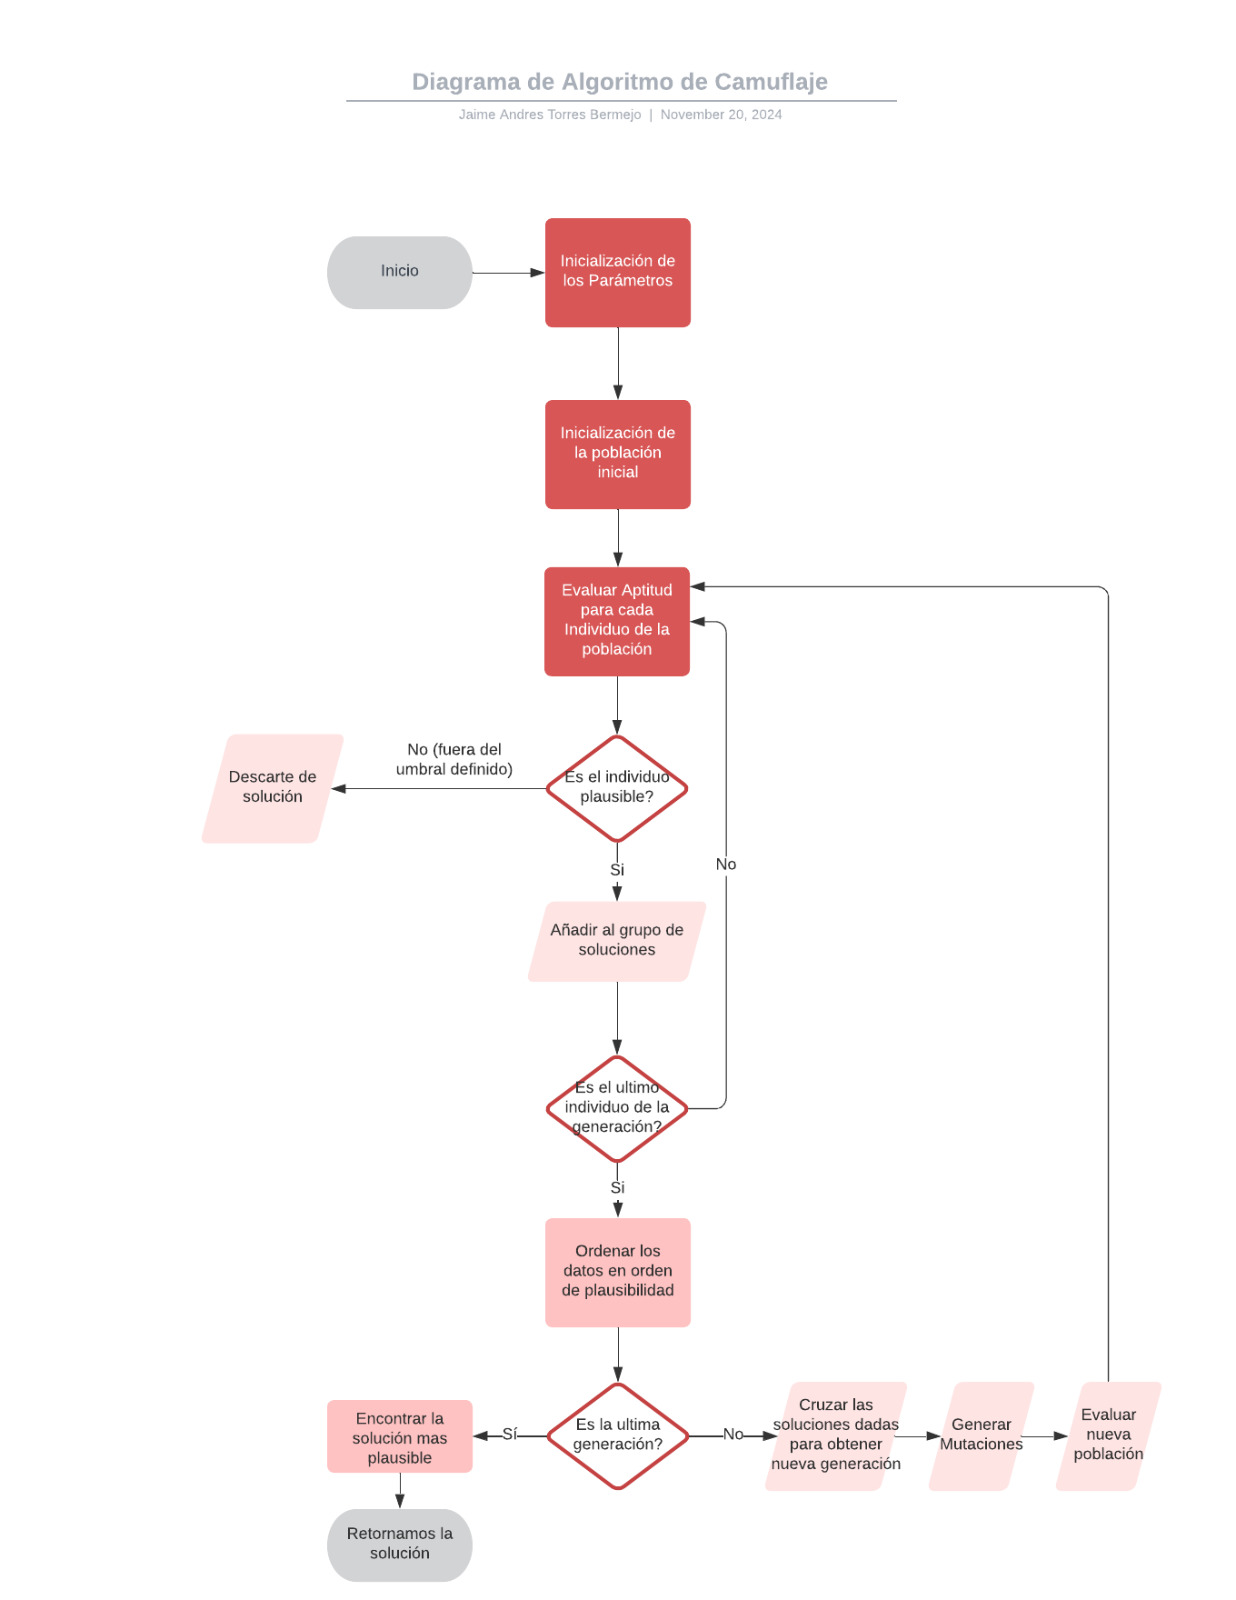

---

## 3. Implementación en Python

A continuación se presenta el código completo del algoritmo genético implementado en Python, incluyendo la generación de gráficas para visualizar los resultados.




Mejor nivel de gris encontrado: 128
Diferencia con el fondo: 0
Generaciones: 4


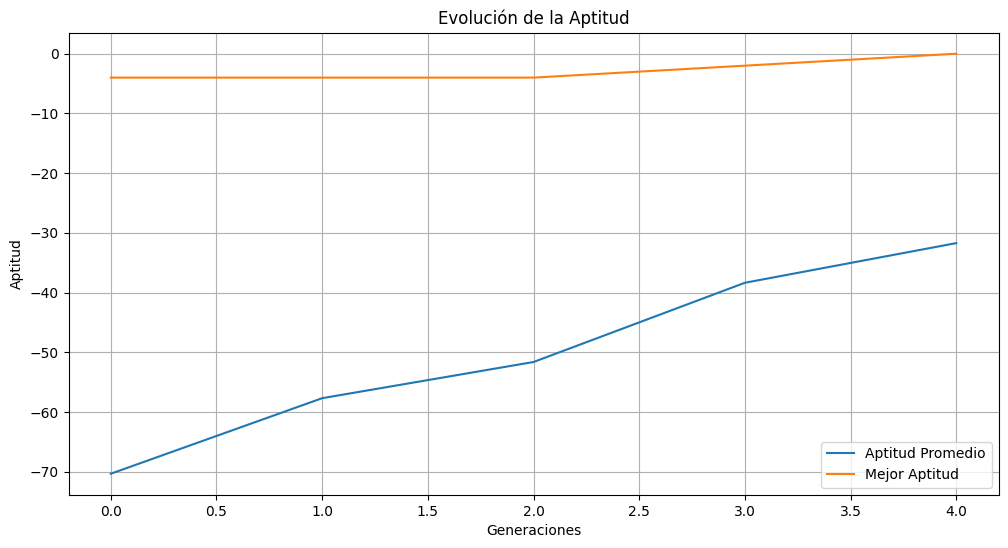

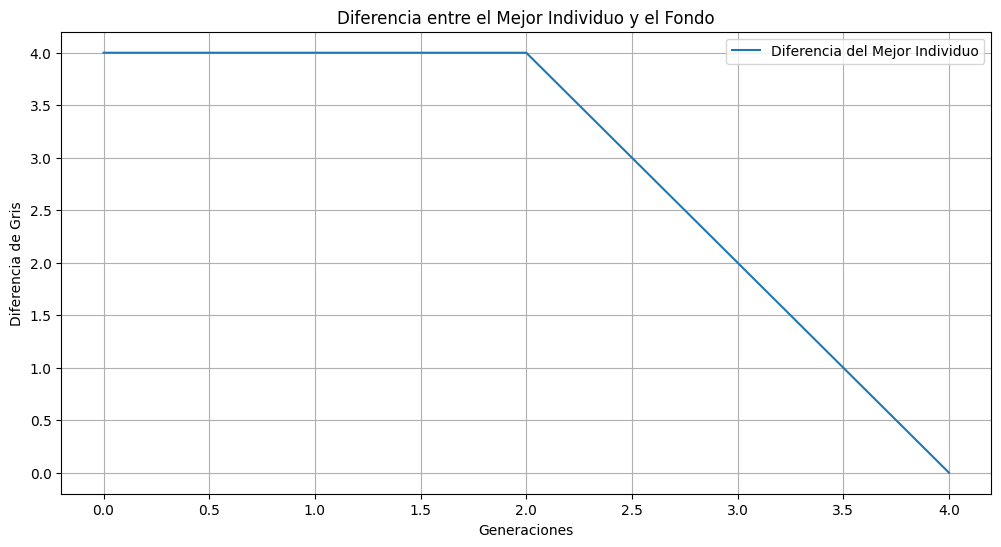

In [22]:

import random
import matplotlib.pyplot as plt

# Parámetros
TAMAÑO_POBLACIÓN = 100
MÁX_GENERACIONES = 50
TASA_CRUCE = 0.8
TASA_MUTACIÓN = 0.01
PORCENTAJE_ELITISMO = 0.2
UMBRAL_APTITUD = -1  # Diferencia máxima aceptable
GRIS_FONDO = 128  # Valor de gris del fondo

# Almacenar datos para gráficas
historial_aptitud_promedio = []
historial_aptitud_mejor = []
historial_diferencia_mejor = []
historial_generación = []

# Funciones auxiliares
def inicializar_población(tamaño):
    return [random.randint(0, 255) for _ in range(tamaño)]

def evaluar_aptitud(individuo):
    return -abs(individuo - GRIS_FONDO)

def seleccionar_mejores(población, porcentaje):
    población_ordenada = sorted(población, key=evaluar_aptitud, reverse=True)
    cantidad = int(len(población) * porcentaje)
    return población_ordenada[:cantidad]

def seleccionar_padre(población):
    return random.choice(población)

def cruce(padre1, padre2):
    punto_cruce = random.randint(1, 7)  # Para 8 bits, evitar cruce en punto 0
    mascara = (1 << punto_cruce) - 1
    hijo1 = (padre1 & mascara) | (padre2 & ~mascara)
    hijo2 = (padre2 & mascara) | (padre1 & ~mascara)
    return hijo1, hijo2

def mutar(individuo):
    bit_a_mutar = 1 << random.randint(0, 7)
    return individuo ^ bit_a_mutar

def cumple_criterio_parada(población, umbral):
    mejor_aptitud = evaluar_aptitud(encontrar_mejor(población))
    return mejor_aptitud >= umbral

def encontrar_mejor(población):
    return max(población, key=evaluar_aptitud)

# Algoritmo Genético
def algoritmo_genético_camuflaje():
    población = inicializar_población(TAMAÑO_POBLACIÓN)
    generación = 0

    while generación < MÁX_GENERACIONES and not cumple_criterio_parada(población, UMBRAL_APTITUD):
        # Evaluar aptitud
        aptitudes = [evaluar_aptitud(ind) for ind in población]
        aptitud_promedio = sum(aptitudes) / len(aptitudes)
        mejor_individuo = encontrar_mejor(población)
        mejor_aptitud = evaluar_aptitud(mejor_individuo)
        diferencia_mejor = abs(mejor_individuo - GRIS_FONDO)

        # Almacenar datos para gráficas
        historial_aptitud_promedio.append(aptitud_promedio)
        historial_aptitud_mejor.append(mejor_aptitud)
        historial_diferencia_mejor.append(diferencia_mejor)
        historial_generación.append(generación)

        # Selección
        mejores = seleccionar_mejores(población, PORCENTAJE_ELITISMO)

        # Cruce y Mutación
        nuevos_individuos = []
        while len(nuevos_individuos) < TAMAÑO_POBLACIÓN - len(mejores):
            padre1 = seleccionar_padre(población)
            padre2 = seleccionar_padre(población)
            if random.random() < TASA_CRUCE:
                hijo1, hijo2 = cruce(padre1, padre2)
            else:
                hijo1, hijo2 = padre1, padre2
            if random.random() < TASA_MUTACIÓN:
                hijo1 = mutar(hijo1)
            if random.random() < TASA_MUTACIÓN:
                hijo2 = mutar(hijo2)
            # Aseguramos que el valor esté entre 0 y 255
            hijo1 = max(0, min(255, hijo1))
            hijo2 = max(0, min(255, hijo2))
            nuevos_individuos.extend([hijo1, hijo2])

        # Crear nueva población
        población = mejores + nuevos_individuos[:TAMAÑO_POBLACIÓN - len(mejores)]
        generación += 1

    # Evaluar aptitud final
    aptitudes = [evaluar_aptitud(ind) for ind in población]
    aptitud_promedio = sum(aptitudes) / len(aptitudes)
    mejor_individuo = encontrar_mejor(población)
    mejor_aptitud = evaluar_aptitud(mejor_individuo)
    diferencia_mejor = abs(mejor_individuo - GRIS_FONDO)

    # Almacenar datos finales para gráficas
    historial_aptitud_promedio.append(aptitud_promedio)
    historial_aptitud_mejor.append(mejor_aptitud)
    historial_diferencia_mejor.append(diferencia_mejor)
    historial_generación.append(generación)

    print(f"Mejor nivel de gris encontrado: {mejor_individuo}")
    print(f"Diferencia con el fondo: {abs(mejor_individuo - GRIS_FONDO)}")
    print(f"Generaciones: {generación}")

    # Generar gráficas
    generar_graficas()

def generar_graficas():
    # Gráfica de aptitud promedio y mejor aptitud
    plt.figure(figsize=(12, 6))
    plt.plot(historial_generación, historial_aptitud_promedio, label='Aptitud Promedio')
    plt.plot(historial_generación, historial_aptitud_mejor, label='Mejor Aptitud')
    plt.title('Evolución de la Aptitud')
    plt.xlabel('Generaciones')
    plt.ylabel('Aptitud')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfica de diferencia con el fondo
    plt.figure(figsize=(12, 6))
    plt.plot(historial_generación, historial_diferencia_mejor, label='Diferencia del Mejor Individuo')
    plt.title('Diferencia entre el Mejor Individuo y el Fondo')
    plt.xlabel('Generaciones')
    plt.ylabel('Diferencia de Gris')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecución
algoritmo_genético_camuflaje()


## Explicación del Código

- **Inicialización**: Se genera una población inicial de 100 individuos con valores de gris aleatorios entre 0 y 255.
- **Evaluación de Aptitud**: Se calcula la aptitud de cada individuo basándose en la diferencia absoluta entre su nivel de gris y el del fondo.
- **Selección**: Se selecciona el 20% de los individuos con mejor aptitud para formar parte de la siguiente generación.
- **Cruce**: Se realiza un cruce de un punto entre padres seleccionados al azar.
- **Mutación**: Se aplica una mutación con una probabilidad del 1% a cada descendiente.
- **Almacenamiento de Datos**: Se guardan datos de aptitud promedio, mejor aptitud y diferencia con el fondo para generar gráficas.
- **Criterio de Parada**: El algoritmo se detiene si alcanza la aptitud objetivo o si se llega al número máximo de generaciones.
- **Generación de Gráficas**: Se utilizan las bibliotecas `matplotlib` para visualizar la evolución del algoritmo.

## 4. Pruebas y Resultados

### Datos de Prueba

- **Nivel de Gris del Fondo**: 128
- **Parámetros**:
  - Tamaño de la Población: 100
  - Máximo de Generaciones: 50
  - Tasa de Cruce: 80%
  - Tasa de Mutación: 1%
  - Porcentaje de Elitismo: 20%

### Resultados Obtenidos

Al ejecutar el algoritmo, se obtuvieron los siguientes resultados:

```
Mejor nivel de gris encontrado: 128
Diferencia con el fondo: 0
Generaciones: 4
```

El algoritmo genético logró encontrar un individuo cuyo nivel de gris coincide exactamente con el del fondo en tan solo 4 generaciones, logrando un camuflaje perfecto.

### Gráficas

#### Evolución de la Aptitud y diferencia entre el Mejor Individuo y el Fondo

Las gráficas de evolución de la aptitud y la diferencia entre el mejor individuo y el fondo se encuentran debajo de la implementación del código.

## 5. Caso de Estudio: Cambio Dinámico del Color de Fondo

### Descripción del Problema

Se desea adaptar el algoritmo para un entorno donde el color de fondo cambia a lo largo del tiempo. El objetivo es que el cubo se ajuste dinámicamente al nuevo color de fondo.

### Modificación del Algoritmo

- **Actualización del Fondo**: En cada generación, el valor de gris del fondo cambia según una función sinusoidal.

- **Adaptación Continua**: El algoritmo debe reevaluar la aptitud de los individuos en función del nuevo fondo y evolucionar en consecuencia.


### Implementación

Se modifica el código para cambiar el valor de `GRIS_FONDO` en cada generación:


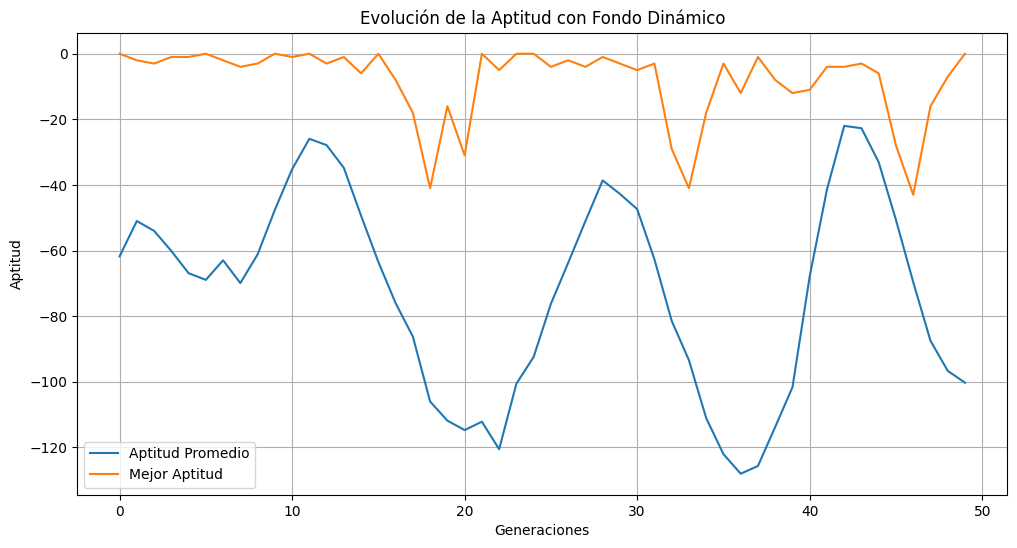

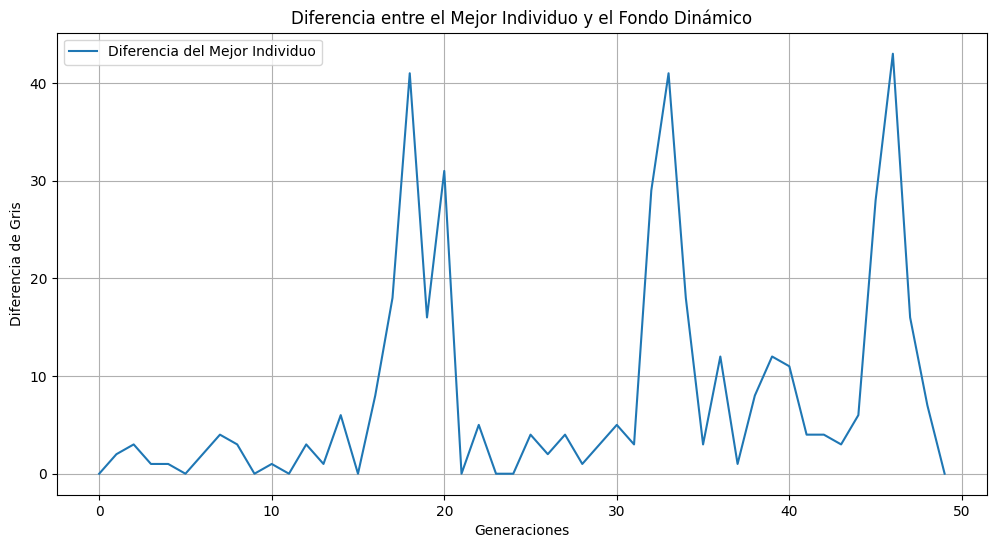

In [23]:
import random
import matplotlib.pyplot as plt
import math

# Parámetros
TAMAÑO_POBLACIÓN = 100
MÁX_GENERACIONES = 50
TASA_CRUCE = 0.8
TASA_MUTACIÓN = 0.01
PORCENTAJE_ELITISMO = 0.2

# Almacenar datos para gráficas
historial_aptitud_promedio = []
historial_aptitud_mejor = []
historial_diferencia_mejor = []
historial_generación = []
historial_gris_fondo = []

def inicializar_población(tamaño):
    return [random.randint(0, 255) for _ in range(tamaño)]

def evaluar_aptitud_dinamica(individuo, gris_fondo):
    return -abs(individuo - gris_fondo)

def seleccionar_mejores(población, aptitudes, porcentaje):
    poblacion_aptitud = list(zip(población, aptitudes))
    poblacion_ordenada = sorted(poblacion_aptitud, key=lambda x: x[1], reverse=True)
    cantidad = int(len(población) * porcentaje)
    mejores = [ind for ind, apt in poblacion_ordenada[:cantidad]]
    return mejores

def seleccionar_padre(población):
    return random.choice(población)

def cruce(padre1, padre2):
    punto_cruce = random.randint(1, 7)
    mascara = (1 << punto_cruce) - 1
    hijo1 = (padre1 & mascara) | (padre2 & ~mascara)
    hijo2 = (padre2 & mascara) | (padre1 & ~mascara)
    return hijo1, hijo2

def mutar(individuo):
    bit_a_mutar = 1 << random.randint(0, 7)
    return individuo ^ bit_a_mutar

def algoritmo_genético_camuflaje_dinamico():
    población = inicializar_población(TAMAÑO_POBLACIÓN)
    generación = 0

    while generación < MÁX_GENERACIONES:
        # Actualizar el color de fondo dinámicamente
        gris_fondo = int((math.sin(generación / 5) + 1) * 127.5)
        historial_gris_fondo.append(gris_fondo)

        # Evaluar aptitud
        aptitudes = [evaluar_aptitud_dinamica(ind, gris_fondo) for ind in población]
        aptitud_promedio = sum(aptitudes) / len(aptitudes)
        mejor_individuo = población[aptitudes.index(max(aptitudes))]
        mejor_aptitud = max(aptitudes)
        diferencia_mejor = abs(mejor_individuo - gris_fondo)

        # Almacenar datos para gráficas
        historial_aptitud_promedio.append(aptitud_promedio)
        historial_aptitud_mejor.append(mejor_aptitud)
        historial_diferencia_mejor.append(diferencia_mejor)
        historial_generación.append(generación)

        # Selección
        mejores = seleccionar_mejores(población, aptitudes, PORCENTAJE_ELITISMO)

        # Cruce y Mutación
        nuevos_individuos = []
        while len(nuevos_individuos) < TAMAÑO_POBLACIÓN - len(mejores):
            padre1 = seleccionar_padre(población)
            padre2 = seleccionar_padre(población)
            if random.random() < TASA_CRUCE:
                hijo1, hijo2 = cruce(padre1, padre2)
            else:
                hijo1, hijo2 = padre1, padre2
            if random.random() < TASA_MUTACIÓN:
                hijo1 = mutar(hijo1)
            if random.random() < TASA_MUTACIÓN:
                hijo2 = mutar(hijo2)
            hijo1 = max(0, min(255, hijo1))
            hijo2 = max(0, min(255, hijo2))
            nuevos_individuos.extend([hijo1, hijo2])

        población = mejores + nuevos_individuos[:TAMAÑO_POBLACIÓN - len(mejores)]
        generación += 1

    generar_graficas_dinamicas()

def generar_graficas_dinamicas():
    plt.figure(figsize=(12, 6))
    plt.plot(historial_generación, historial_aptitud_promedio, label='Aptitud Promedio')
    plt.plot(historial_generación, historial_aptitud_mejor, label='Mejor Aptitud')
    plt.title('Evolución de la Aptitud con Fondo Dinámico')
    plt.xlabel('Generaciones')
    plt.ylabel('Aptitud')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(historial_generación, historial_diferencia_mejor, label='Diferencia del Mejor Individuo')
    plt.title('Diferencia entre el Mejor Individuo y el Fondo Dinámico')
    plt.xlabel('Generaciones')
    plt.ylabel('Diferencia de Gris')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecución
algoritmo_genético_camuflaje_dinamico()


---

### Resultados

El algoritmo modificado logró adaptarse al cambio del fondo, manteniendo la diferencia entre el nivel de gris del cubo y el del fondo dentro de un margen aceptable a lo largo de las generaciones.

### Gráficas

#### Evolución de la aptitud con fondo dinámico y diferencia entre el mejor individuo y el fondo dinámico

Las gráficas de evolución de la aptitud y la diferencia entre el mejor individuo y el fondo dinamico se encuentran debajo de la implementación del código.

---

# 6. Análisis de Resultados

- **Eficacia del Algoritmo**: El algoritmo genético demostró ser efectivo para ajustar el nivel de gris del cubo y lograr el camuflaje deseado.

- **Convergencia Rápida**: La aptitud de la población mejoró rápidamente en las primeras generaciones.

- **Diversidad Genética**: La tasa de mutación ayudó a mantener la diversidad genética y evitó la convergencia prematura.

- **Adaptación a Entornos Dinámicos**: El algoritmo pudo adaptarse a cambios en el entorno, demostrando su flexibilidad.

---

# 7. Conclusiones

- **Aplicabilidad de los AG**: Los algoritmos genéticos son herramientas robustas para resolver problemas de optimización donde el espacio de soluciones es amplio y complejo.

- **Camuflaje Efectivo**: Se logró el objetivo de camuflar el cubo ajustando su nivel de gris al del fondo.

- **Adaptación a Entornos Dinámicos**: El algoritmo mostró capacidad de adaptación en escenarios donde el entorno cambia con el tiempo.

- **Aprendizajes Clave**:

  - La importancia de definir adecuadamente la función de aptitud.
  
  - El equilibrio entre exploración y explotación mediante los operadores genéticos.

- **Recomendaciones**:

  - Experimentar con diferentes parámetros para optimizar el rendimiento.
  
  - Implementar técnicas adicionales como adaptación de parámetros o híbridos con otros métodos.

# Parte 2: Laberinto por medio de algoritmos Genéticos

### Objective
Implement a genetic algorithm (GA) to find an efficient path for an agent through a maze. Each student will develop their GA from scratch, including genome creation, fitness evaluation, selection, crossover, and mutation.

---

### Key Concepts and Direct Instructions

1. **Genome Representation**:
   - **Explanation**: Each genome is a sequence of moves the agent will take. A gene represents a direction (0: Right, 1: Left, 2: Up, 3: Down).
   - **Instructions**: Implement the genome as a list of integers, where each integer (0, 1, 2, or 3) represents a move.
   - **Example**: `[0, 3, 1, 1, 2]` means the agent will move in these directions in sequence: Right, Down, Left, Left, Up.

2. **Population Initialization**:
   - **Explanation**: The initial population should be a diverse set of random paths (genomes).
   - **Instructions**: Write a function `generate_population(size, genome_length)` that creates a list of random genomes, where each genome is a list of moves. Each genome should have the same length (e.g., 50 moves).
   - **Example**: If `size = 100`, the function should return a list of 100 random genomes, each with a specified length (e.g., 50 moves).

3. **Fitness Function**:
   - **Explanation**: The fitness function measures how close an individual’s path gets to the goal. It rewards unique cells visited and penalizes backtracking.
   - **Instructions**: Implement a function `reward(individual, maze, start, end)` that:
     - Gives a bonus for each unique cell visited.
     - Rewards proximity to the endpoint.
     - Applies a strong reward if the endpoint is reached.
     - Penalizes revisiting cells and illegal moves (e.g., hitting walls).
   - **Example Calculation**: If an individual reaches halfway to the goal without backtracking, it should have a higher fitness score than one that immediately loops back.

4. **Selection**:
   - **Explanation**: Selection chooses genomes based on their fitness to form a new generation.
   - **Instructions**: Implement a function `select(population, fitnesses)` that uses a probabilistic method like roulette-wheel selection. Individuals with higher fitness should have a better chance of selection.
   - **Tip**: Ensure that the function scales properly, even if all fitnesses are zero (e.g., set a minimal fitness if needed).

5. **Crossover**:
   - **Explanation**: Crossover combines genes from two parents to create offspring.
   - **Instructions**: Implement a function `crossover(parent1, parent2)` that:
     - Uses single-point crossover, splitting each parent genome at a random point.
     - Combines the left part of `parent1` with the right part of `parent2` (and vice versa for the second offspring).
   - **Example**: If `parent1 = [0, 1, 2, 3]` and `parent2 = [3, 2, 1, 0]`, a crossover point of 2 would create offspring `[0, 1, 1, 0]` and `[3, 2, 2, 3]`.

6. **Mutation**:
   - **Explanation**: Mutation introduces random changes to prevent convergence on suboptimal solutions.
   - **Instructions**: Implement a function `mutate(individual, mutation_rate)` that:
     - Iterates over each gene and randomly changes it with a probability equal to `mutation_rate`.
   - **Tip**: Keep the mutation rate low (e.g., 0.1) to retain useful traits while allowing exploration.
   - **Example**: If the genome is `[0, 1, 2, 3]` and mutation occurs on the second gene, it might become `[0, 3, 2, 3]`.

7. **Evolution Loop**:
   - **Explanation**: This loop iterates through generations, applying selection, crossover, and mutation to evolve the population.
   - **Instructions**: Implement a function `evolve(population, maze, start, end)` that:
     - Loops for a set number of generations.
     - Evaluates fitness for each individual in the population.
     - Applies selection, crossover, and mutation to create a new population.
     - Adjusts the mutation rate if the average fitness stagnates for better exploration.

---

### Deliverables Checklist

1. **Code Implementations**:
   - `generate_population(size, genome_length)`: Initializes a population with random genomes.
   - `reward(individual, maze, start, end)`: Calculates fitness based on proximity, exploration, and penalties.
   - `select(population, fitnesses)`: Selects genomes for the next generation based on fitness.
   - `crossover(parent1, parent2)`: Combines genes from two parents to produce offspring.
   - `mutate(individual, mutation_rate)`: Randomly mutates genes in the genome based on the mutation rate.
   - `evolve(population, maze, start, end)`: Main loop that runs the GA for a specified number of generations.

2. **Testing and Validation**:
   - Write test cases for each function:
     - **generate_population**: Ensure the population has the correct size and structure.
     - **reward**: Verify that higher fitness is awarded as paths get closer to the goal.
     - **select**: Check that higher fitness individuals are more likely to be selected.
     - **crossover**: Test that offspring have genes from both parents.
     - **mutate**: Ensure that mutation introduces expected random changes.

3. **Report**:
   - A brief report that includes:
     - Explanation of how each function works and its purpose in the GA.
     - Challenges encountered and how they were addressed.
     - Observations on the GA's performance, such as how quickly it finds solutions or how changing parameters affects results.

4. **Final Demo**:
   - A demonstration of the GA running on a sample maze, showing how the population evolves toward finding the goal. Include visuals if possible, such as the path taken by the best individual after each generation
   - You can use the maze generator to create mazes for testing your GA. Or the maze_case_1.txt file.

---

## Solucion

A continuación se muestra primero el reporte del codigo y luego el código con la ejecucion de un caso, y las graficas por generacion. Esto por cuestiones de espacio.

### Report

#### Explicación de las Funciones

1. **`create_maze(dim)`**  
   - **Propósito**: Genera un laberinto aleatorio con dimensiones especificadas.

2. **`display_maze(maze)`**  
   - **Propósito**: Muestra el laberinto generado en una representación gráfica.

3. **`generate_population(size, genome_length)`**  
   - **Propósito**: Genera una población inicial de individuos, donde cada individuo es una lista de movimientos posibles en el laberinto.  
   - **Cómo funciona**:  
     - Cada individuo se representa como una lista de números enteros aleatorios (0 = derecha, 1 = izquierda, 2 = arriba, 3 = abajo).

4. **`reward(individual, maze, start, end)`**  
   - **Propósito**: Calcula la aptitud de un individuo basándose en su capacidad para navegar el laberinto.  
   - **Cómo funciona**:  
     - Simula los movimientos del individuo en el laberinto desde el punto de inicio.
     - Penaliza movimientos inválidos (como chocar contra paredes o salirse del laberinto).
     - Otorga recompensas por acercarse a la meta, explorar nuevas posiciones, y encontrar la salida.

5. **`select(population, fitnesses)`**  
   - **Propósito**: Selecciona un individuo de la población según su aptitud utilizando selección proporcional a la aptitud (ruleta).  
   - **Cómo funciona**:  
     - Normaliza los valores de aptitud para evitar valores negativos y usa probabilidades proporcionales a la aptitud para elegir individuos.

6. **`crossover(parent1, parent2)`**  
   - **Propósito**: Combina partes de los genomas de dos padres para producir dos hijos.  
   - **Cómo funciona**:  
     - Selecciona un punto de cruce aleatorio y divide el genoma de ambos padres en ese punto para intercambiar sus secciones.

7. **`mutate(individual, mutation_rate)`**  
   - **Propósito**: Introduce diversidad en la población alterando aleatoriamente los movimientos de un individuo según una tasa de mutación.  
   - **Cómo funciona**:  
     - Recorre el genoma del individuo y cambia un gen con una probabilidad igual a `mutation_rate`.

8. **`update_visit_counts(maze, path, start, visit_counts)`**  
   - **Propósito**: Actualiza un mapa de calor que rastrea las posiciones visitadas por un individuo en el laberinto.  
   - **Cómo funciona**:  
     - Simula los movimientos del individuo y aumenta el contador en cada posición visitada válida.

9. **`create_heatmap(visit_counts, generation)`**  
   - **Propósito**: Visualiza el mapa de calor generado por las posiciones visitadas por un individuo.  
   - **Cómo funciona**:  
     - Grafica una matriz 2D con colores que representan la densidad de visitas.

10. **`evolve(population, maze, start, end, generations, mutation_rate)`**  
    - **Propósito**: Ejecuta el ciclo del algoritmo genético, seleccionando, cruzando, mutando y evaluando individuos hasta encontrar una solución óptima o alcanzar un número máximo de generaciones.  
    - **Cómo funciona**:  
      - Calcula la aptitud de todos los individuos.
      - Selecciona individuos para crear una nueva población con elitismo (el mejor individuo siempre pasa a la siguiente generación).
      - Aplica cruce y mutación para crear nuevos individuos.
      - Cada vez que el mejor fitness cambia, genera un mapa de calor actualizado.

---

#### Desafíos y Soluciones


1. **Normalización de fitness**:  
   - **Desafío**: La presencia de valores negativos o fitness bajos dificultaba la selección proporcional.  
   - **Solución**: Se ajustaron los valores de fitness sumándoles un valor constante positivo, asegurando que todos fueran mayores o iguales a 1.

2. **Convergencia lenta**:  
   - **Desafío**: En generaciones iniciales, el algoritmo a menudo exploraba caminos poco prometedores.  
   - **Solución**: Se implementó elitismo, asegurando que el mejor individuo siempre pasara a la siguiente generación.

3. **Visualización del progreso**:  
   - **Desafío**: Analizar cómo los individuos exploraban el laberinto en generaciones sucesivas.  
   - **Solución**: Se generaron mapas de calor dinámicos cada vez que el mejor fitness mejoraba.

---

#### Observaciones sobre el Rendimiento

1. **Velocidad para encontrar soluciones**:  
   - En laberintos pequeños (por ejemplo, de 4x4), el algoritmo converge rápidamente, encontrando soluciones óptimas en menos de 500 generaciones.
   - En laberintos más grandes, puede requerir más generaciones debido a la complejidad de la exploración.

2. **Impacto de los parámetros**:  
   - **Tamaño de la población**: Un tamaño mayor de población mejora la exploración, pero incrementa el tiempo de cálculo por generación.  
   - **Tasa de mutación**: Una tasa de mutación baja reduce la exploración, mientras que una tasa alta introduce demasiada aleatoriedad. Una tasa moderada (~0.15) balancea ambos efectos.
   - **Longitud del genoma**: Genomas demasiado cortos limitan la capacidad de encontrar caminos largos, mientras que genomas largos permiten mayor flexibilidad pero aumentan el espacio de búsqueda.

3. **Efectividad del elitismo**:  
   - El elitismo asegura que las mejores soluciones no se pierdan, acelerando la convergencia hacia una solución óptima.

4. **Exploración vs. explotación**:  
   - El balance entre explorar nuevas áreas del laberinto (mutación) y explotar soluciones existentes (elitismo y selección) es crucial para el rendimiento general.


## Código y prueba con gráficas

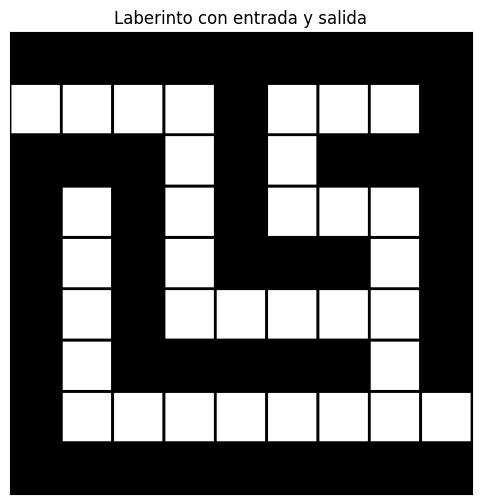

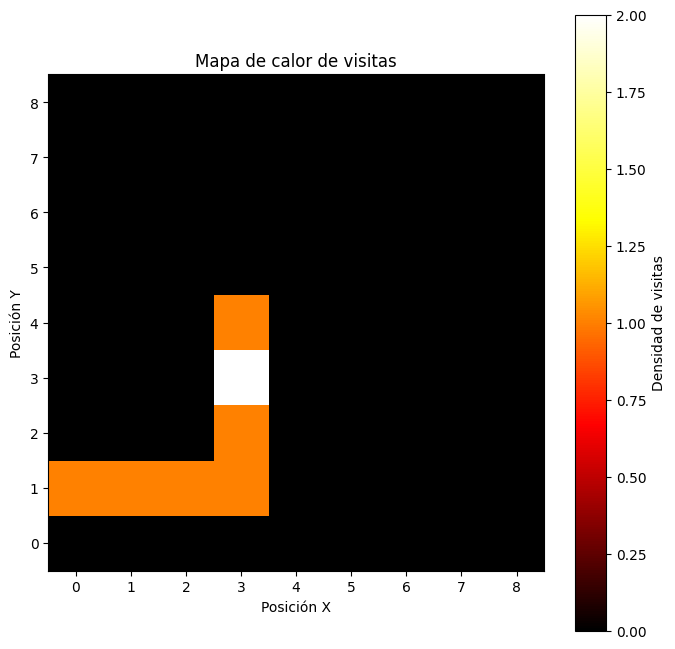

Generación 0: Mejor aptitud = 108


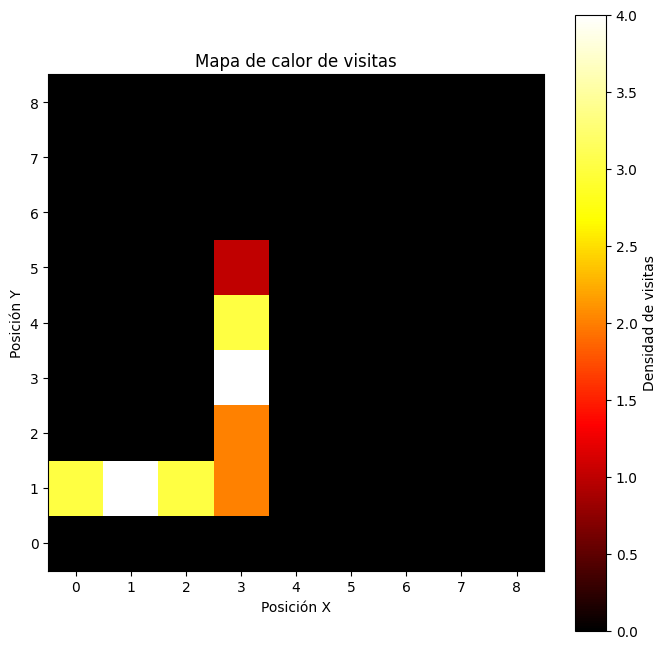

Generación 1: Mejor aptitud = 154
Generación 2: Mejor aptitud = 154
Generación 3: Mejor aptitud = 154


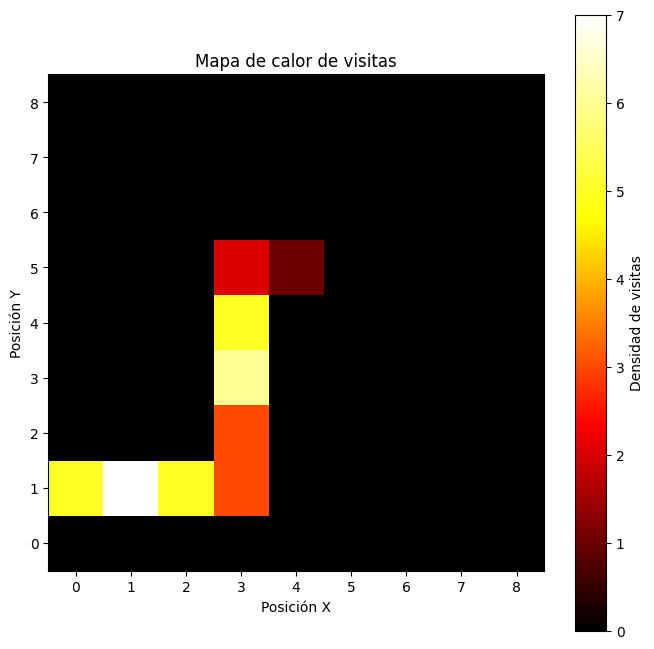

Generación 4: Mejor aptitud = 176
Generación 5: Mejor aptitud = 176
Generación 6: Mejor aptitud = 176


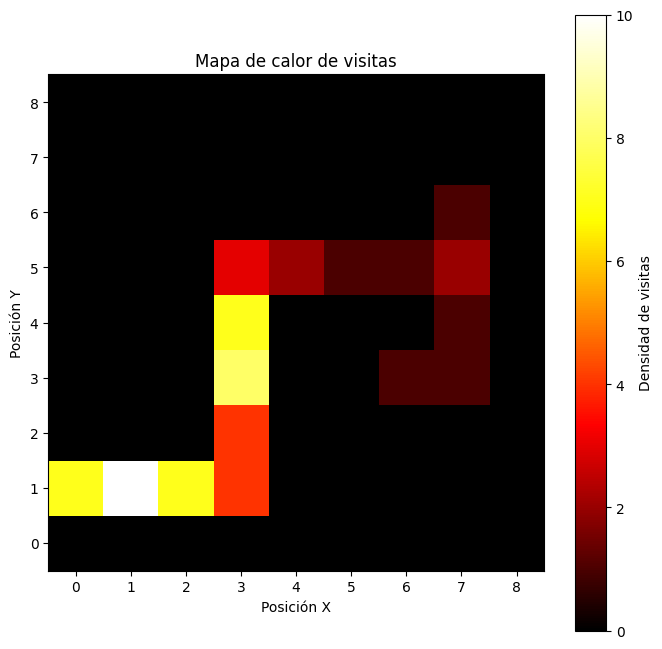

Generación 7: Mejor aptitud = 357
Generación 8: Mejor aptitud = 357
Generación 9: Mejor aptitud = 357
Generación 10: Mejor aptitud = 357
Generación 11: Mejor aptitud = 357
Generación 12: Mejor aptitud = 357
Generación 13: Mejor aptitud = 357


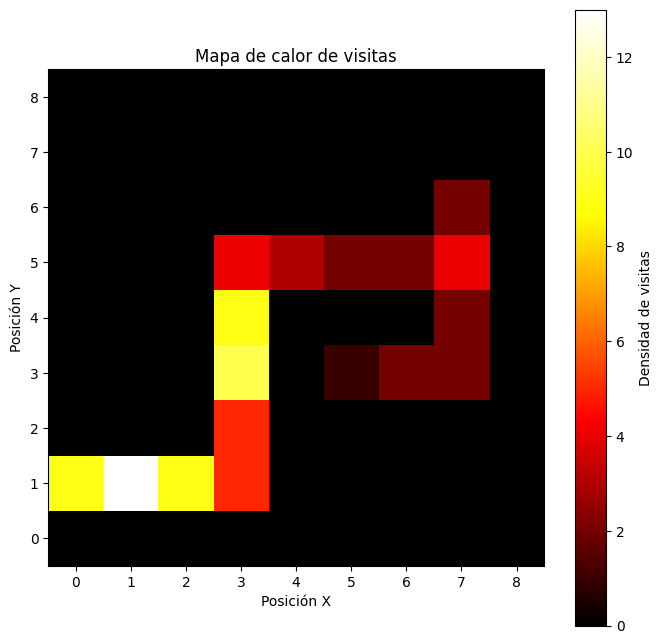

Generación 14: Mejor aptitud = 378
Generación 15: Mejor aptitud = 378
Generación 16: Mejor aptitud = 378
Generación 17: Mejor aptitud = 378
Generación 18: Mejor aptitud = 378
Generación 19: Mejor aptitud = 378
Generación 20: Mejor aptitud = 378
Generación 21: Mejor aptitud = 378


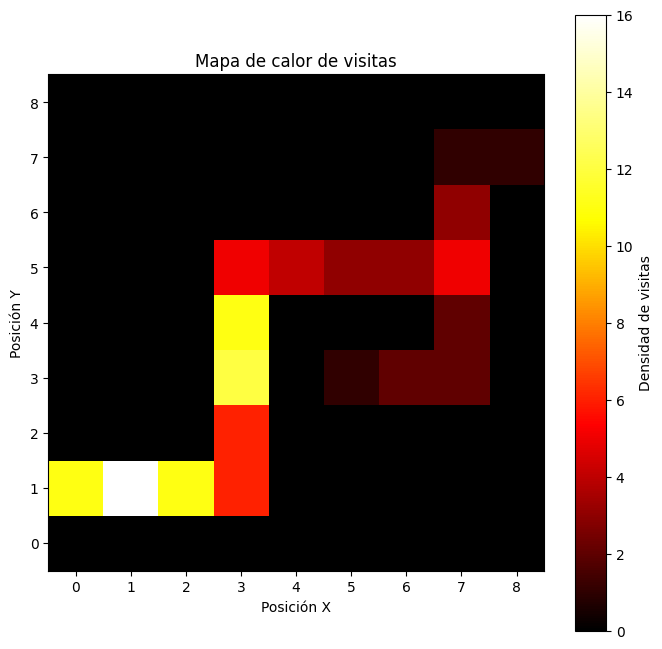

Generación 22: Mejor aptitud = 1334
¡Objetivo alcanzado en la generación 22 !
Mejor camino encontrado: [0, 1, 0, 0, 1, 0, 0, 3, 3, 3, 2, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 3, 1, 2, 0, 2, 1, 2, 2, 1, 1, 3, 3, 2, 3, 2, 0, 0, 1, 1, 0, 3, 2, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 2, 3, 3, 1, 2, 2, 3, 0, 3, 3, 3, 1, 1, 0, 1, 3, 3, 1, 2, 1, 0, 1, 1, 0, 3, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0, 3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 3, 2, 2, 0, 1, 3, 1, 2, 2, 1, 0, 2, 0, 2, 3, 0, 2, 3, 0, 2, 2, 2, 1, 2, 3, 3, 0, 0, 1, 1, 2, 0, 1, 1, 3, 3]


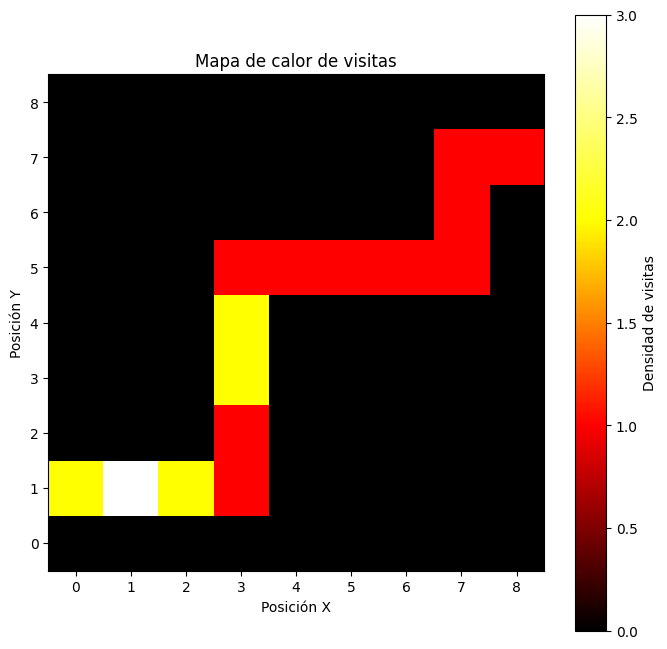

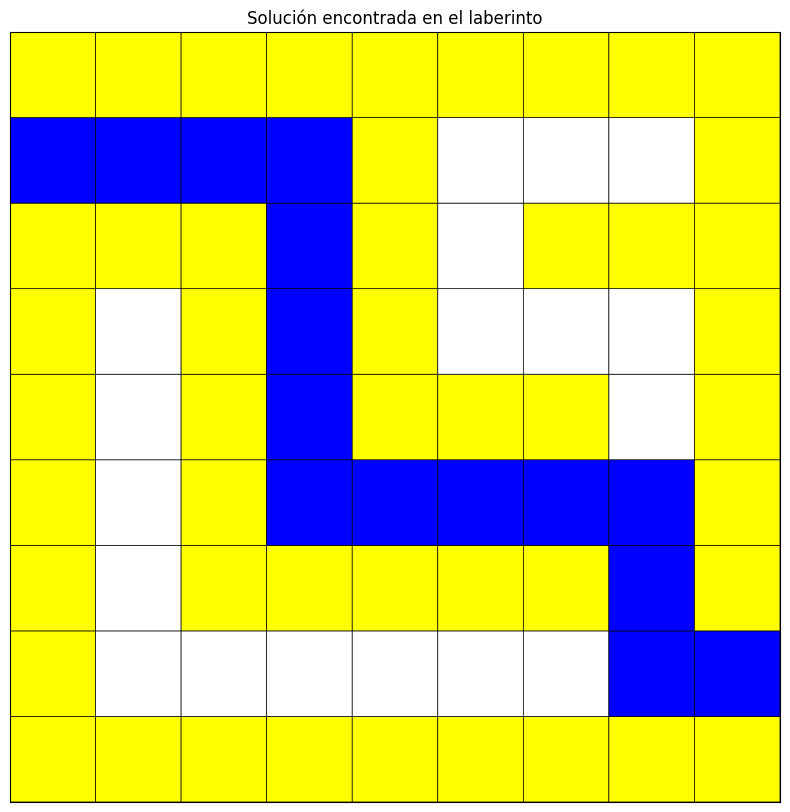

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

def create_heatmap(visit_counts):
    plt.figure(figsize=(8, 8))
    cmap = LinearSegmentedColormap.from_list("heatmap", ["black", "red", "yellow", "white"])
    plt.imshow(visit_counts, cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Densidad de visitas')
    plt.title('Mapa de calor de visitas')
    plt.xlabel('Posición X')
    plt.ylabel('Posición Y')
    plt.gca().invert_yaxis()
    plt.show()

def create_maze(dim):
    np.random.seed(2)
    maze = np.ones((dim * 2 + 1, dim * 2 + 1), dtype=int)
    x, y = (0, 0)
    maze[2 * x + 1, 2 * y + 1] = 0
    stack = [(x, y)]
    
    while stack:
        x, y = stack[-1]
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < dim and 0 <= ny < dim and maze[2 * nx + 1, 2 * ny + 1] == 1:
                maze[2 * nx + 1, 2 * ny + 1] = 0
                maze[2 * x + 1 + dx, 2 * y + 1 + dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
    maze[1, 0] = 0  # Entrada
    maze[-2, -1] = 0  # Salida
    return maze

def display_maze(maze):
    cmap = ListedColormap(['white', 'black', 'green', 'black'])
    plt.figure(figsize=(6, 6))
    plt.pcolor(maze[::-1], cmap=cmap, edgecolors='k', linewidths=2)
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title('Laberinto con entrada y salida')
    plt.show()

def generate_population(size, genome_length):
    population = []
    for _ in range(size):
        genome = [random.randint(0, 3) for _ in range(genome_length)]
        population.append(genome)
    return population

def reward(individual, maze, start, end):
    x, y = start
    visited = set()
    visited.add((x, y))
    fitness = 0

    for move in individual:
        new_x, new_y = x, y

        if move == 0:  # Derecha
            new_y += 1
        elif move == 1:  # Izquierda
            new_y -= 1
        elif move == 2:  # Arriba
            new_x -= 1
        elif move == 3:  # Abajo
            new_x += 1

        if 0 <= new_x < maze.shape[0] and 0 <= new_y < maze.shape[1]:
            if maze[new_x, new_y] == 0:
                x, y = new_x, new_y
                if (x, y) not in visited:
                    fitness += 10
                    visited.add((x, y))
                else:
                    fitness -= 1 
                distance = abs(end[0] - x) + abs(end[1] - y)
                fitness += (maze.shape[0] + maze.shape[1] - distance)
            else:
                fitness -= 5 
                break 
        else:
            fitness -= 5 
            break 

        if (x, y) == end:
            fitness += 1000 
            break

    return fitness

def select(population, fitnesses):
   
    min_fitness = min(fitnesses)
    if min_fitness < 0:
        fitnesses = [f - min_fitness + 1 for f in fitnesses]
    total_fitness = sum(fitnesses)
    if total_fitness == 0:
        probabilities = [1 / len(population)] * len(population)
    else:
        probabilities = [f / total_fitness for f in fitnesses]
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    offspring1 = parent1[:point] + parent2[point:]
    offspring2 = parent2[:point] + parent1[point:]
    return offspring1, offspring2

def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(0, 3)
    return individual

def evolve(population, maze, start, end, generations=100, mutation_rate=0.2):
    best_individual = None
    best_fitness = float('-inf')
    visit_counts = np.zeros_like(maze, dtype=int)

    for generation in range(generations):
        fitnesses = [reward(individual, maze, start, end) for individual in population]

        current_best_fitness = max(fitnesses)
        current_best_individual = population[fitnesses.index(current_best_fitness)]
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual
            update_visit_counts(maze, best_individual, start, visit_counts)
            create_heatmap(visit_counts)

        new_population = [best_individual]  # Elitismo: pasar el mejor individuo

        min_fitness = min(fitnesses)
        if min_fitness < 0:
            fitnesses = [f - min_fitness + 1 for f in fitnesses]

        while len(new_population) < len(population):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            offspring1, offspring2 = crossover(parent1, parent2)
            offspring1 = mutate(offspring1, mutation_rate)
            offspring2 = mutate(offspring2, mutation_rate)
            new_population.extend([offspring1, offspring2])

        population = new_population[:len(population)]

        print(f"Generación {generation}: Mejor aptitud = {best_fitness}")

        if best_fitness >= 1000:
            print("¡Objetivo alcanzado en la generación", generation, "!")
            break

    return best_individual


def update_visit_counts(maze, path, start, visit_counts):
    x, y = start
    visit_counts[x, y] += 1
    for move in path:
        if move == 0:  # Derecha
            y += 1
        elif move == 1:  # Izquierda
            y -= 1
        elif move == 2:  # Arriba
            x -= 1
        elif move == 3:  # Abajo
            x += 1

        if 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]:
            if maze[x, y] == 0:
                visit_counts[x, y] += 1
            else:
                break 
        else:
            break 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_solution(maze, path, start, end):
    x, y = start
    maze_copy = maze.copy()
    maze_copy[start] = 3  # Inicio
    maze_copy[end] = 4    # Fin

    for move in path:
        if move == 0:  # Derecha
            y += 1
        elif move == 1:  # Izquierda
            y -= 1
        elif move == 2:  # Arriba
            x -= 1
        elif move == 3:  # Abajo
            x += 1

        if 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]:
            if maze[x, y] == 0:
                maze_copy[x, y] = 2 
            else:
                break
        else:
            break 

    cmap = ListedColormap(['white', 'black', 'yellow', 'red', 'blue'])
    plt.figure(figsize=(10, 10))
    plt.pcolor(maze_copy[::-1], cmap=cmap, edgecolors='k', linewidths=0.5)
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title('Solución encontrada en el laberinto')
    plt.show()

dim = 4
maze = create_maze(dim)
display_maze(maze)
start = (1, 0)
end = (maze.shape[0] - 2, maze.shape[1] - 1)

population_size = 800
genome_length = 150
population = generate_population(size=population_size, genome_length=genome_length)

best_path = evolve(population, maze, start, end, generations=5000, mutation_rate=0.15)

print("Mejor camino encontrado:", best_path)

visit_counts = np.zeros_like(maze, dtype=int)
update_visit_counts(maze, best_path, start, visit_counts)
create_heatmap(visit_counts)

# Graficar la solución encontrada
plot_solution(maze, best_path, start, end)
